# Probability 2 (Data science Master, University of Lille) / CMF, (Centrale Lille, G3 SDIA)

---

## Lab 1 - Discrete time homogeneous Markov chains

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate basic Markov chains (discrete time and discrete state space).

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab1` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab1 --file=requirement.txt
    conda activate lab1
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab1
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab1`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation    

## <a name="content">Contents</a>
- [Exercise 1: Ehrenfest model](#ex1)
- [Exercise 2: Simulation of a discrete time homogeneous Markov chain](#ex2)

In [6]:
# "IPython magic command" to automatically reload any module whose
# implementation has been modified during the execution of the notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## <a name="ex1">Exercise 1: Ehrenfest model</a> [(&#8593;)](#content) <!-- [$\cdot$/10] -->
 Consider a system of $K = 30$ particles (labeled from 1 to $K$) evolving in a closed box. The box is divided into two compartments in contact with each other, respectively identified by an index, $0$ and $1$. A hole at the interface between the two compartments allows the particles to move from one compartment to the other.

 Particle motion is modeled as follows: at each discrete time intant $n$, one particle is chosen uniformly at random and moved from its current compartment to the other. Let $X(n)$ denote the number of particles in compartment $0$ at time $n$.

1\. <!--[$\cdot$/0.5]--> Briefly justify that $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain.

Pour montrer que $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ est une chaîne de Markov, il faut montrer que la probabilité de transition ne dépend que de l'état courant et non des états précédents. Or, la probabilité de transition ne dépend que de l'état courant car on choisit une particule au hasard et on la déplace dans l'autre compartiment. On ne prend pas en compte les états précédents.

2\. <!--[$\cdot$/1.5]--> Is the chain irreducible? (Positive) recurrent? Aperiodic or periodic? Prove each statement from your answer (recall the main steps covered during the exercise session).

- Pour montrer que la chaîne est irréductible, il faut montrer que pour tout état $i$ et $j$, il existe $n \in \mathbb{N}$ tel que $P^n(i,j) > 0$. Or, on peut passer de n'importe quel état à n'importe quel autre état en un nombre fini de pas. Donc la chaîne est irréductible.
- Puisque l'espace d'état est fini et la chaine est irréductible, la chaîne est positive récurrente.
- La chaine est périodique de période 2 car on ne peut pas passer de l'état $i$ à l'état $i$ qu'en un nombre pair de pas.

3\. <!--[$\cdot$/0.5]--> Recall the structure of the transition matrix, and encode it in Python (without any for loop).

 > Hint: use the function `numpy.diag`.

- à l'état $i$ différent de 0 et K, on peut passer à l'état $i-1$ si on choisit la particule de compartiment 0 , donc avec probabilité $\frac{i}{K}$, et on peut passer à l'état $i+1$ si on choisit la particule de compartiment 1, donc avec probabilité $1-\frac{i}{K}$. 
- si on est en etats K ou 0, on ne peut que passer à l'état $K-1$ ou $1$ respectivement. Donc la matrice de transition est :

In [7]:
 
import numpy as np
K=30
matrice_transitions = np.diag((1/K) * np.arange(1,K+1), k=-1)+np.diag((1/K) * np.arange(K,0,-1), k=1)

4\. <!--[$\cdot$/0.5]-->Numerically verify that the binomial distribution $\mathcal{B} (K, 1/2)$ is invariant for the chain. This invariant distribution will be denoted by $\pi$ in the rest of the exercise.

 > Hint: you can use `scipy.stats.binom`.

Pour demontrer que la distribution binomiale est invariante, il faut montrer que $\pi P = \pi$. 

In [8]:
from scipy.stats import binom
vecteur_proba_initiale = binom.pmf(np.arange(0,K+1), K, 0.5)
np.allclose(vecteur_proba_initiale,vecteur_proba_initiale.dot(matrice_transitions))

True

5\. <!--[$\cdot$/2]--> Implement a Python function `ehrenfest` to simulate a trajectory of the chain for a system of $K$ particles, for initial distribution $\mu$ (for instance a Dirac centered in $0$, meaning that the compartment $0$ is empty at $n = 0$). The maximum number of time steps will be controlled by an input parameter $n_{\max}$. Random number generation will be controlled by a [random number generator](https://numpy.org/doc/stable/reference/random/generator.html) passed as an input to the function.

For an efficient implementation, **do not use vector-matrix product with the transition matrix implemented in 3**: rely on the description of the system instead.


In [9]:
def ehrenfest(K, n_max,matrice_transitions,rng):
    """
    Input:  
    K: nombre de molécules
    n_max: nombre maximal de sauts
    matrice_transitions : matrice de transition
    rng : générateur de nombres aléatoires
    
    Output: 
        X : vecteur des valeurs prises par la chaîne
    """
    X0 = 0
    X = [X0]
    for i in range(n_max):
        X.append(rng.choice(np.arange(0,K+1),p=matrice_transitions[X[i],:]))
    return X
    

6\. Simulate a trajectory of the chain starting in state $0$ for $n_{\max} = 5000$. Display the result in function of the time index $n$. Briefly describe the curve you obtained.

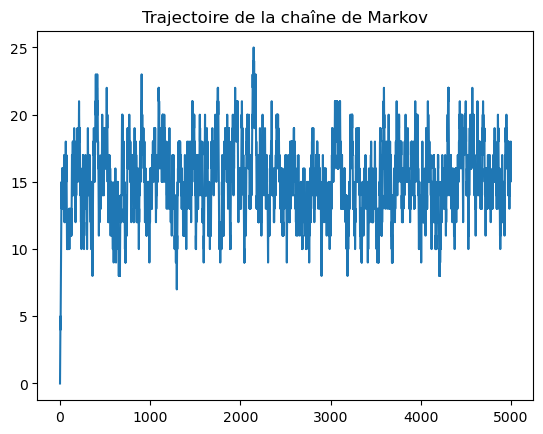

In [10]:
import matplotlib.pyplot as plt
rng = np.random.default_rng(1234)
n_max = 5000
X = ehrenfest(K, n_max,matrice_transitions,rng=rng)
plt.title("Trajectoire de la chaîne de Markov")
plt.plot(X)


On remaque que la courbe est une marche aléatoire. Elle oscille autour de la valeur $15$. ce qu'est logique car on savait que la distribution converge vers une ditribution binomiale de paramètre $K$ et $1/2$ qu'est centré en $K/2$.
(on peut le voir sur la courbe ci-dessous)

7\. Compare the empirical histogram of the trajectory obtained in 5. to the theoretical limit distribution $\pi$. What do you observe?

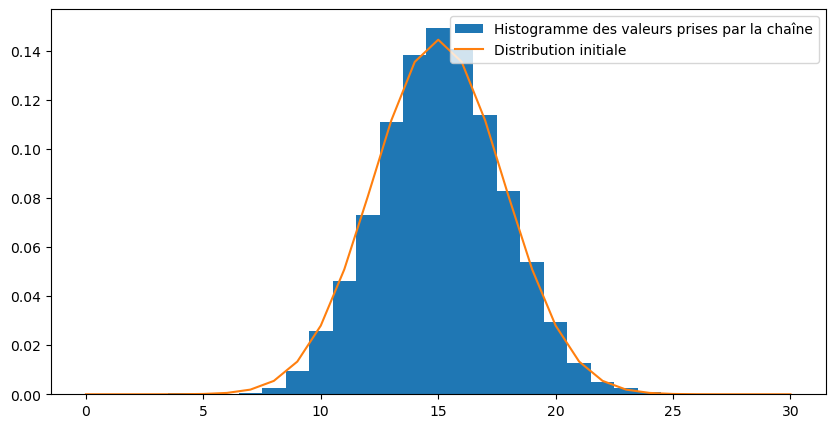

In [11]:
plt.figure(figsize=(10,5))
plt.hist(X, density=True, bins=[i+1/2 for i in range(K)], label="Histogramme des valeurs prises par la chaîne")
plt.plot(np.arange(0,K+1),vecteur_proba_initiale,label="Distribution initiale")
plt.legend()

8\. a) Modify the function defined in 5. so that it returns the return time to state 0, defined as $T_{0,0} = \inf \bigl\{ n > 0, X(n) = 0 \mid X(0) = 0 \bigr\}$.

In [12]:
def ehrenfest_Q8(K,matrice_transitions,rng=rng):
    """
    Input:  
    K: nombre de molécules
    n_max: nombre maximal de sauts
    matrice_transitions : matrice de transition
    rng : générateur de nombres aléatoires
    
    Output: 
        counter : nombre de sauts avant de revenir à l'état initial
    """
    counter = 0
    X = 0
    X = rng.choice(np.arange(0,K+1),p=matrice_transitions[X,:])
    while X!=0:
        counter += 1
        X = rng.choice(np.arange(0,K+1),p=matrice_transitions[X,:])
        
    return counter

8\. b) [**Optional**] Run several chains (about 5, ideally in parallel) for $K = 10$, $n_{\max} = 5000$, and compare the empirical average of $T_{0,0}$ to $\pi(0)$. What do you observe?
 > Hint: a good tutorial showing how to run functions in parallel in Python is available [here](https://www.machinelearningplus.com/python/parallel-processing-python/).

In [13]:
 
K=10
T00 = []
matrice_transitions = np.diag((1/K) * np.arange(1,K+1), k=-1)+np.diag((1/K) * np.arange(K,0,-1), k=1)
for i in range(20):
    rng = np.random.default_rng(np.random.randint(0,1000))
    T00.append(ehrenfest_Q8(K,matrice_transitions,rng=rng))

print("Nombre de sauts avant de retomber à l'état initial 0 : ",np.array(T00))
print("Moyenne empirique : ",np.mean(T00))
vecteur_proba_initiale = binom.pmf(np.arange(0,K+1), K, 0.5)
print("Moyenne théorique : ",1/vecteur_proba_initiale[0])

Nombre de sauts avant de retomber à l'état initial 0 :  [ 599 1493 1059  413 1217  181    3 2031 1963 1281 1459  797  389 1773
  773  279 2985   57  285 1243]
Moyenne empirique :  1014.0
Moyenne théorique :  1024.0


On remarque que la moyenne empirique de $T_{0,0}$ est proche de la valeur théorique $\frac{1}{\pi(0)}$.ce qu'est prevu car on sait que la chaine est irréductible et récurrente donc E($T_{0,0}$) = $\frac{1}{\pi(0)}$.

8\. c) Comment on the possibility of numerically observing the chain returning to its initial state as $K$ increases.

En voyant la loi binomiale on a $\pi(0) = \frac{1}{2^K}$, et donc la moyenne theorique de $T_{0,0}$ est $\frac{1}{\pi(0)} = 2^K$. Donc plus $K$ est grand, plus la moyenne de $T_{0,0}$ est grande.

---
## <a name="ex2">Exercise 2: Simulation of a discrete time homogeneous Markov chain</a> [(&#8593;)](#content)
 Let $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ be a discrete time homogeneous Markov chain defined by the following initial distribution $\mu \in \mathbb{R}^K$ and transition matrix $P \in \mathbb{R}^{K \times K}$, with $K = 3$:

$$
  \mu = [0, 1, 0], 
  %
  \quad
  %
  P = \begin{pmatrix}
   0.2 & 0.7 & 0.1 \\
   0.9 & 0 & 0.1 \\
   0.2 & 0.8 & 0 
  \end{pmatrix}.
$$

1\. What can you say about the Markov chain $X$? (irreducibility, positive recurrence, periodicity, ...). Justify each of your claim, citing the relevant results from the lecture.

__Réponse:__ La chaine est irréductible car on peut passer de n'importe quel état à n'importe quel autre état en un nombre fini de pas. La chaine est positive récurrente car l'espace d'état est fini et la chaine est irréductible. L'état 0 est apériodique donc la chaine est apériodique car elle est irréductible.

2\. Write a function `simulate_dthmc` simulating the trajectory of the Markov chain $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ for $n_{\max}$ time steps. The signature of the function should include the following elements:
   - list of inputs: transition matrix $P$, initial distribution $\mu$, number of time steps $n_{\max}$, [random number generator](https://numpy.org/doc/stable/reference/random/generator.html);
   - output: array of lenght $n_{\max}$ representing the trajectory.
   
**To this end, do not use matrix vector products, which would lead to an extremely inefficient algorithm in this case.**
   

In [14]:
def simulate_dthmc(matrice_transitions,n_max,ditrubtion_init,rng=rng):
    """
    Input:  
    matrice_transitions : matrice de transition
    n_max: nombre maximal de sauts
    distribution_init : distribution initiale
    rng : générateur de nombres aléatoires
    
    Output: 
        X : vecteur des valeurs prises par la chaîne
    """
    X0 = rng.choice(np.arange(0,len(ditrubtion_init)),p=ditrubtion_init)
    X = [X0]
    for i in range(n_max):
        X.append(rng.choice(np.arange(0,len(ditrubtion_init)),p=matrice_transitions[X[i],:]))
    return X

3\. Simulate a trajectory of the chain for $n_{\max} = 2000$ starting from $X(0) = 1$. Plot the histogram of the states visited by the chain.
 

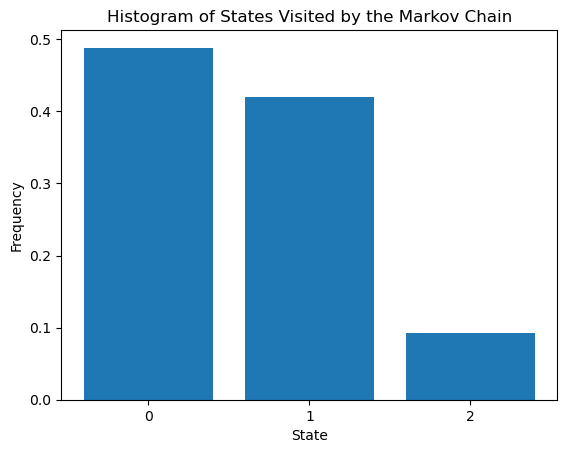

In [15]:
n_max = 2000
initial_distribution = [0, 1, 0]
transition_matrix = np.array([[0.2, 0.7, 0.1], [0.9, 0, 0.1], [0.2, 0.8, 0]])

trajectory = simulate_dthmc(transition_matrix, n_max, initial_distribution, rng=rng)

plt.hist(trajectory, bins=[0, 1, 2,3], density=True,align='left', rwidth=0.8)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Histogram of States Visited by the Markov Chain')
plt.xticks([0, 1, 2])
plt.show()


4\. Determine numerically an invariant distribution $\boldsymbol{\pi}$ of the chain (*e.g.*, based on an eigendecomposition [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). Is it unique? Compare it to the histogram obtained in 2 (superimpose graphs). What can you conclude?
 

__reponse__ : La chaine est irréductible à espace fini donc elle admet une unique distribution invariante. Cette distrubtion correspond au vecteur propre normalisé associé à la valeur propre 1 de la matrice de transition.
De plus d'après le cours on sait que la distribution invariante est la limite de la distribution empirique de la chaine et c'est ce qu'on peut remarque sur le graphique ci-dessous.

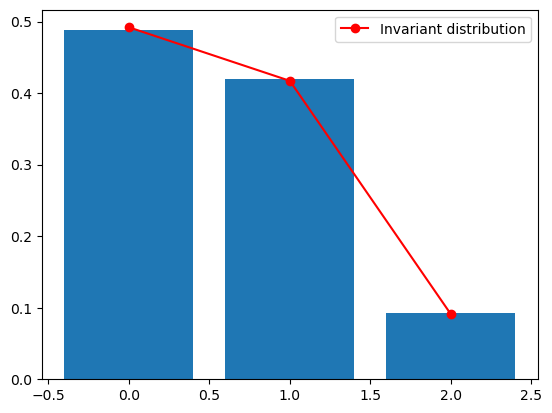

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
invariant_distribution = eigenvectors[:, np.isclose(eigenvalues, 1)]
invariant_distribution = invariant_distribution / np.sum(invariant_distribution)

plt.hist(trajectory, bins=[0, 1, 2,3], density=True,align='left', rwidth=0.8)
plt.plot(np.arange(3), invariant_distribution.flatten(), 'ro-', label="Invariant distribution")
plt.legend()
plt.show()


5\. a) Compute $\mu_n \triangleq \mu P^n$, the probability distribution of $X(n)$. What is the limit of $\mu_n$ as $n$ goes to $+\infty$? Illustrate the result numerically.


__Réponse:__ Puisque notre chaine est irréductible et positive récurrente, on sait que la distribution $\mu_n$ converge vers la distribution invariante $\pi$. On peut le voir sur la courbe ci-dessous.

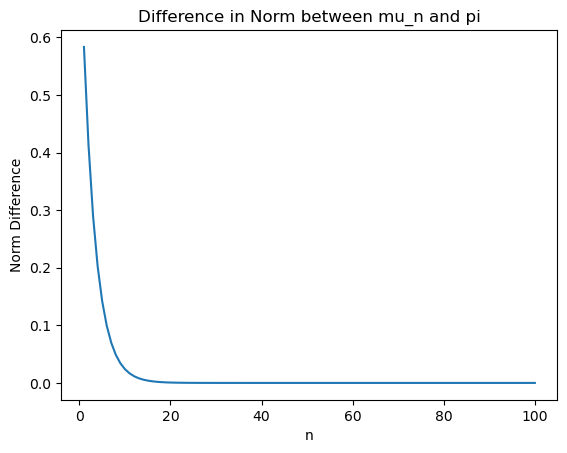

In [17]:
norm_diff = []
mu_n = np.array([0, 1, 0])
for n in range(1, 101):
    mu_n = mu_n @ transition_matrix
    diff = np.linalg.norm(mu_n - invariant_distribution.reshape(3))
    norm_diff.append(diff)

plt.plot(range(1, 101), norm_diff)
plt.xlabel('n')
plt.ylabel('Norm Difference')
plt.title('Difference in Norm between mu_n and pi')
plt.show()

5\. b) Display on the same graph the curves $n \mapsto \mu_n(i)$ for $i = 0, \dotsc , K-1$, and compare with $\pi$. Display on another graph the function $n \mapsto \Vert \mu_n - \pi \Vert_1$, where $\Vert \cdot \Vert_1$ is the $\ell_1$ norm. What does each of these curves illustrate?

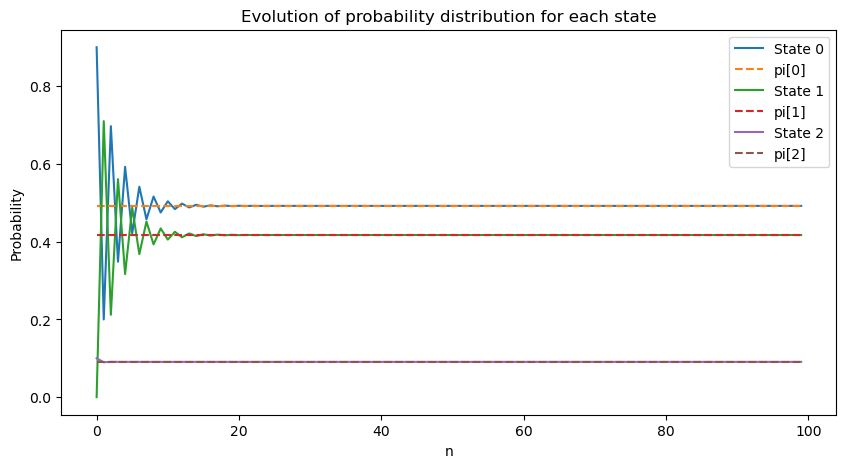

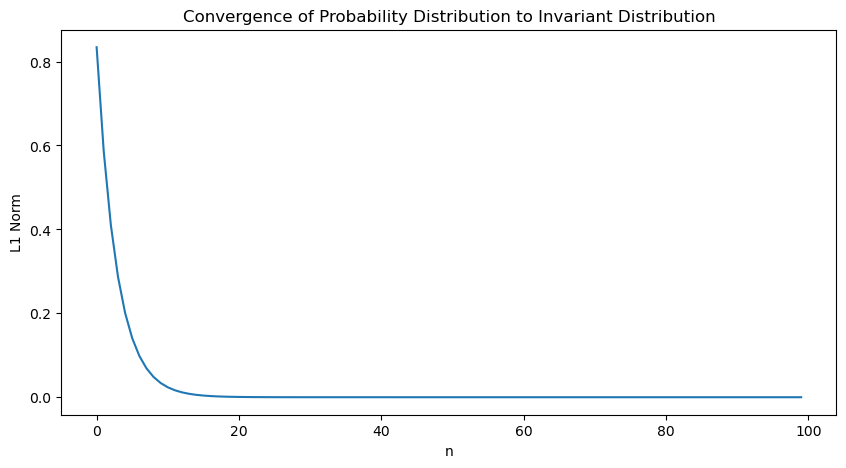

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
n_max = 100
states = np.arange(3)
norms = []
Mu = []
mu_n = np.array([0, 1, 0])
norm_diff = []
for i in range(n_max):
    mu_n = mu_n @ transition_matrix
    Mu.append(mu_n)
    diff = np.linalg.norm(mu_n - invariant_distribution.reshape(3), ord=1)
    norm_diff.append(diff)
    
for state in states:
    plt.plot(np.arange(n_max), [mu[state] for mu in Mu], label=f"State {state}")
    plt.plot(np.arange(n_max), [invariant_distribution[state]] * n_max, '--', label=f"pi[{state}]")

plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Evolution of probability distribution for each state')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(np.arange(n_max), norm_diff)
plt.xlabel('n')
plt.ylabel('L1 Norm')
plt.title('Convergence of Probability Distribution to Invariant Distribution')
plt.show()

La première  courbe montre la vitesse de convergence des probabilités des états vers les probibiltés invariantes. On remarque que la vitesse de convergence est plus rapide pour l'état 1 que pour l'état 0 et 2. Cela peut s'expliquer en remarquant que mu[2] = 0.09 à peut pres égale au probabilté de passage à l'état 2 depuis l'état 1 ou l'état 0 (0.1). 
La deuxième courbe montre la vitesse de convergence de la distribution $\mu_n$ vers la distribution invariante $\pi$. On peut dire que la convergence est exponentielle.

6\. For each state $i \in \{0, \dotsc, K-1 \}$, simulate 100 trajectories starting from the state $i$ until the return time to $i$. For each state, compute the (empirical) average return time. Compare with its theoretical value.
 

In [19]:
return_times = []
n_max = 100
for state in range(3):
    state_return_times = []
    for _ in range(300):
        initial_distribution = np.array([1 if i == state else 0 for i in range(len(initial_distribution))])
        trajectory = simulate_dthmc(transition_matrix, n_max, initial_distribution, rng=rng)
        return_time = trajectory[1:].index(state)+1
        state_return_times.append(return_time)
    
    average_return_time = np.mean(state_return_times)
    return_times.append(average_return_time)

print("Theoretical return times:", [1 / pi for pi in invariant_distribution])
print("Empirical return times:", return_times)


Theoretical return times: [array([2.0326087]), array([2.3974359]), array([11.])]
Empirical return times: [2.0033333333333334, 2.37, 11.31]


On peut voir que les temps de retour empiriques sont effectivement proches des temps de retour théoriques.